📊 TASK 1 — Exploratory Data Analysis (EDA)
📌 1. Descriptive Statistics

In [2]:
import pandas as pd

In [4]:
df = pd.read_csv("../data/raw_analyst_ratings.csv")
df.head()

,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


In [5]:
df['headline_length'] = df['headline'].str.len()
df['headline_length'].describe()

count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64

In [6]:
df['publisher'].value_counts()


publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
                      ...  
MoneyGeek                 1
muathe                    1
Robert Morris             1
LeftCoastHedgie           1
Jeremie Capron            1
Name: count, Length: 1034, dtype: int64

🧠 2. Text Analysis

Sentiment Analysis (Headlines)

In [9]:
from textblob import TextBlob

def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

df['sentiment'] = df['headline'].apply(get_sentiment)

df['sentiment_label'] = df['sentiment'].apply(
    lambda x: 'positive' if x>0 else 'negative' if x<0 else 'neutral'
)

✅ TASK 2 — Quantitative Analysis (TA-Lib + PyNance)

In [13]:
import pandas as pd

df = pd.read_csv('/home/kidus/Documents/Financial_stock/data/yfinance_data/AAPL_historical_data.csv')  # must include OHLCV
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

In [15]:
import talib

df['SMA_20'] = talib.SMA(df['Close'], timeperiod=20)
df['EMA_20'] = talib.EMA(df['Close'], timeperiod=20)
df['RSI'] = talib.RSI(df['Close'], timeperiod=14)
df['MACD'], df['MACD_signal'], df['MACD_hist'] = talib.MACD(df['Close'])

Matplotlib is building the font cache; this may take a moment.


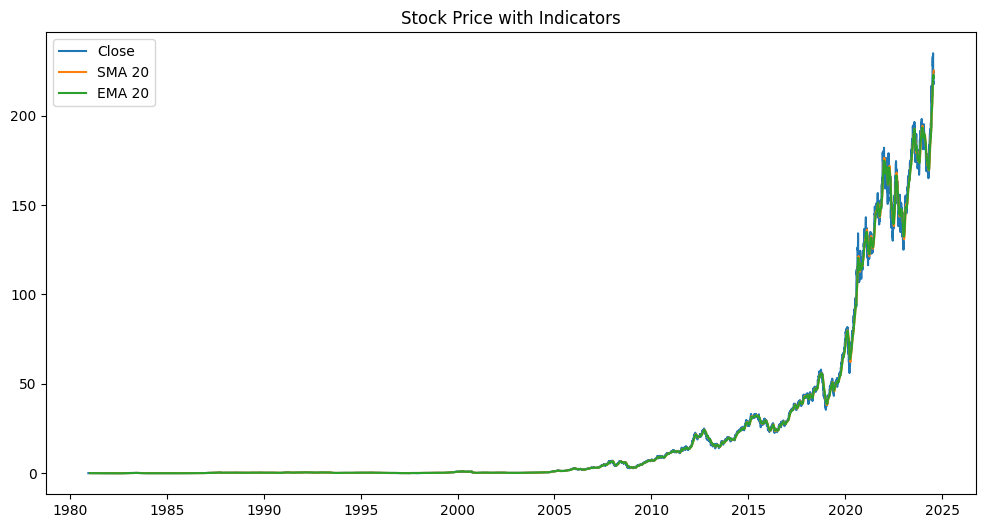

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(df['Close'], label='Close')
plt.plot(df['SMA_20'], label='SMA 20')
plt.plot(df['EMA_20'], label='EMA 20')
plt.legend()
plt.title("Stock Price with Indicators")
plt.show()